<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import matplotlib
import os
import seaborn as sns

In [3]:
#Importation de la librairie plotly express
import plotly.express as px

In [4]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

# Afficher toutes les colonnes du DataFrame
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [5]:
#print(os.getcwd())  = getcwd = get current working directory
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

c:\Users\jorda\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\jorda\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\jorda\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [6]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [7]:
#Consulter le nombre de colonnes
len(df_erp.columns)

#La nature des données dans chacune des colonnes

df_erp.dtypes

#Le nombre de valeurs présentes dans chacune des colonnes

#df_erp.count()

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

In [8]:
#Afficher les 5 premières lignes de la table

df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [9]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp['product_id'].duplicated().any()

False

In [10]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()

#permet de rajouter le nombre d'occurrence tout en voyant les valeurs distinctes
df_erp['stock_status'].value_counts()

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# => A la colonne stock_quantity : quand stock quantity = 0 alors stock_status ='outofstock'



stock_status
instock       733
outofstock     92
Name: count, dtype: int64

In [11]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] == 0, 'outofstock', 'instock')

df_erp


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [12]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp['stock_status'] == df_erp['stock_status_2']

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [13]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
#En Python, quand vous utilisez .sum() sur une série de booléens, les True et False sont automatiquement convertis en 1 et 0
(df_erp['stock_status'] == df_erp['stock_status_2']).sum()

821

In [14]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
ecart = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

#ou

ecart = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']][['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']]

print(ecart)

     product_id  stock_quantity stock_status stock_status_2
4          4039               3   outofstock        instock
398        4885               0      instock     outofstock
449        4973             -10   outofstock        instock
573        5700              -1   outofstock        instock


In [15]:
#Corriger la ou les données incohérentes

#df_erp.loc[df_merge['product_id'] == 4039, 'stock_status'] = 'instock'
df_erp.loc[df_erp['product_id'] == 4885, 'stock_status'] = 'outofstock'

#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2'], 'stock_status'] = df_erp['stock_status_2']

#je dois supprimer les deux lignes en stock négatif?#Non car supprimer des produits peut changer CA
(df_erp['stock_status'] == df_erp['stock_status_2']).sum()

#PASSAGE A 0 DES DEUX VALEURS NEGATIVES DE STOCKQUANTITY
df_erp.loc[df_erp['product_id'] == 4973, 'stock_quantity'] = 0
df_erp.loc[df_erp['product_id'] == 5700, 'stock_quantity'] = 0

# Vérifier que les modifications ont été appliquées
verification = df_erp[df_erp['product_id'].isin([4973, 5700])][['product_id', 'stock_quantity']]
print("Vérification des stocks modifiés :")
print(verification)

Vérification des stocks modifiés :
     product_id  stock_quantity
449        4973               0
573        5700               0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [16]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
prix_problematiques = df_erp[
    (df_erp['price'].isna()) |  # Prix non renseignés
    (df_erp ['price'] <= 0)      # Prix négatifs ou nuls
]
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum())) 
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum est : {}".format(df_erp['price'].min()))

#Afficher le prix maximum de la colonne "price"
print("Le prix maximum est : {}".format(df_erp['price'].max()))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_negatifs = df_erp[df_erp['price'] < 0][['product_id', 'purchase_price', 'price']]
print("Articles avec des prix négatifs :")
print(prix_negatifs)


#il faudrait pouvoir demander confirmation du réel prix du produit et au cas échéant le supprimer de notre base de données en conservant tout de même une trace des produits retirés suite à des informations manquantes ou erronées



Nombres d'article avec un prix non renseignés: 0
Le prix minimum est : -20.0
Le prix maximum est : 225.0
Articles avec des prix négatifs :
     product_id  purchase_price  price
151        4233           10.33  -20.0
469        5017            4.34   -8.0
739        6594            4.61   -9.1


In [17]:
# Inverser les prix négatifs en utilisant la valeur absolue
df_erp.loc[df_erp['product_id'].isin([4233, 5017, 6594]), 'price'] = df_erp.loc[df_erp['product_id'].isin([4233, 5017, 6594]), 'price'].abs()

# Vérifier les modifications
prix_corriges = df_erp[df_erp['product_id'].isin([4233, 5017, 6594])][['product_id', 'price']]
print("\nPrix après correction :")
print(prix_corriges)


Prix après correction :
     product_id  price
151        4233   20.0
469        5017    8.0
739        6594    9.1


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [18]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
df_erp['stock_quantity'].min()

#ou

print("La quantité minimum en stock est : {}".format(df_erp['stock_quantity'].min()))

#Afficher la quantité maximum de la colonne "stock_quantity"
df_erp['stock_quantity'].max()

#ou 

print("La quantité maximum en stock est : {}".format(df_erp['stock_quantity'].max()))

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0][['product_id', 'stock_quantity']]
print("Articles avec des stocks négatifs :")
print(stocks_negatifs)

#vérifier ces stocks afin de savoir si une erreur a été commise en incluant un '-' sinon passer ces stocks à 0 = df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

La quantité minimum en stock est : 0
La quantité maximum en stock est : 145
Articles avec des stocks négatifs :
Empty DataFrame
Columns: [product_id, stock_quantity]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [19]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Valeurs dans onsale_web et leur fréquence :")
print(df_erp['onsale_web'].value_counts())

#c'est une colonne de type booléenne où 0 signifie que le produit n'est pas en vente sur le web et 1 signifie qu'il y est

Valeurs dans onsale_web et leur fréquence :
onsale_web
1    716
0    109
Name: count, dtype: int64


In [20]:
#Quelles sont les colonnes à conserver selon vous?
#toutes les colonnes sauf stock_status_2 qui est redondante

In [21]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".

df_erp = df_erp.drop('stock_status_2', axis=1)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [22]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
prix_achat_manquants = df_erp[df_erp['purchase_price'].isna()][['product_id', 'purchase_price']]
print("\nDétail des articles sans prix d'achat :")
print(prix_achat_manquants)
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix minimum est : {}".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix maximum est : {}".format(df_erp['purchase_price'].max()))



Détail des articles sans prix d'achat :
Empty DataFrame
Columns: [product_id, purchase_price]
Index: []
Le prix minimum est : 2.74
Le prix maximum est : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [23]:
#Dimension du dataset
print("Dimensions du dataset : {}".format(df_web.shape))
#Nombre d'observations

print("Nombre d'observations (lignes) : {}".format(len(df_web)))
#Nombre de caractéristiques
print("Nombre de caractéristiques (colonnes) : {}".format(len(df_web.columns)))

Dimensions du dataset : (1513, 29)
Nombre d'observations (lignes) : 1513
Nombre de caractéristiques (colonnes) : 29


In [24]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

df_web.info()

#ou # Nombre de colonnes
#print("Nombre de colonnes :", len(df_web.columns))

# Types de données
#print("\nTypes de données :")
#print(df_web.dtypes)

# Nombre de valeurs non-nulles par colonne
#print("\nNombre de valeurs par colonne :")
#print(df_web.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [25]:
#Selon vous, quelles sont les colonnes à conserver ?
#Les colonnes à conserver seraient 'sku', 'total_sales', 'product_type', 'post_title', 'guid' et 'post_type'


In [26]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web_clean = df_web[['sku', 'total_sales', 'product_type', 'post_title', 'post_type', 'guid']]
df_web_clean

,sku,total_sales,product_type,post_title,post_type,guid
0,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,attachment,https://www.bottle-neck.fr/wp-content/uploads/...
1,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,product,https://www.bottle-neck.fr/?post_type=product&...
2,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,product,https://www.bottle-neck.fr/?post_type=product&...
3,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,attachment,https://www.bottle-neck.fr/wp-content/uploads/...
4,304,8.0,Champagne,Champagne Gosset Grande Réserve,attachment,https://www.bottle-neck.fr/wp-content/uploads/...
...,...,...,...,...,...,...
1508,NaN,NaN,NaN,NaN,NaN,NaN
1509,NaN,NaN,NaN,NaN,NaN,NaN
1510,NaN,NaN,NaN,NaN,NaN,NaN
1511,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web_clean['sku'].value_counts()

sku
38                     2
15779                  2
15741                  2
15745                  2
15746                  2
                      ..
14865                  2
14897                  2
14899                  2
14905                  2
bon-cadeau-25-euros    2
Name: count, Length: 714, dtype: int64

In [28]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
sku_anormaux = df_web_clean[~df_web_clean['sku'].astype(str).str.match('^\d+$')] #en partant du principe que la codification est 'seulement des chiffres'. 
#sku_anormaux = df_web[~df_web['sku'].astype(str).str.isdigit()]
print(sku_anormaux)





                      sku  total_sales product_type  \
1424              13127-1          4.0          Vin   
1425              13127-1          4.0          Vin   
1426  bon-cadeau-25-euros          7.0        Autre   
1427  bon-cadeau-25-euros          7.0          NaN   
1428                  NaN          NaN          NaN   
...                   ...          ...          ...   
1508                  NaN          NaN          NaN   
1509                  NaN          NaN          NaN   
1510                  NaN          NaN          NaN   
1511                  NaN          NaN          NaN   
1512                  NaN          NaN          NaN   

                                        post_title   post_type  \
1424  Clos du Mont-Olivet Châteauneuf-du-Pape 2007     product   
1425  Clos du Mont-Olivet Châteauneuf-du-Pape 2007  attachment   
1426                             Bon cadeau de 25€  attachment   
1427                             Bon cadeau de 25€     product   
1428     

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jorda\AppData\Local\Temp\ipykernel_11548\952691223.py:2: SyntaxWarning: invalid escape sequence '\d'
  sku_anormaux = df_web_clean[~df_web_clean['sku'].astype(str).str.match('^\d+$')] #en partant du principe que la codification est 'seulement des chiffres'.


In [29]:
#Identifier les lignes sans code articles
lignes_sans_sku = df_web_clean[df_web_clean['sku'].isna()][['sku', 'post_title']]
print("Nombre de lignes sans SKU : {}".format(len(lignes_sans_sku)))
print("\nDétail des lignes sans SKU :")
print(lignes_sans_sku)

Nombre de lignes sans SKU : 85

Détail des lignes sans SKU :
      sku post_title
1428  NaN        NaN
1429  NaN        NaN
1430  NaN        NaN
1431  NaN        NaN
1432  NaN        NaN
...   ...        ...
1508  NaN        NaN
1509  NaN        NaN
1510  NaN        NaN
1511  NaN        NaN
1512  NaN        NaN

[85 rows x 2 columns]


In [30]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
#Pour les codes articles non renseignés : les supprimer car un produit sans identifiant ne peux être lié à l'ERP
    #df_web = df_web.drop(lignes_sans_sku.index)
#Pour les codes articles non numériques : vérifier s'il existe une référence, documentez le souci auquel cas l'exemple se présenterait de nouveau et supprimer ces lignes
    #df_web = df_web.drop(sku_anormaux.index)


In [31]:
#création d'un dataframe sans les sku non conformes
#Si je les supprime avant du coup df_web contient seulement les données conformes non?
df_web_super_clean = df_web_clean[df_web_clean['sku'].astype(str).str.isdigit()]

#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web_super_clean['sku'].is_unique
doublons = df_web_super_clean[df_web_super_clean['sku'].duplicated()][['sku', 'post_title']]
print("Nombre de doublons : {}".format(len(doublons)))
print("\nDétail des doublons :")

#Le retour est 'False', il y a donc des doublons


df_web_super_clean = df_web_super_clean[df_web_super_clean['post_type'] == 'product']

print(df_web_super_clean.sort_values(by=['sku']))

doublons = df_web_super_clean[df_web_super_clean['sku'].duplicated()][['sku', 'post_title']]
print("Nombre de doublons : {}".format(len(doublons)))

Nombre de doublons : 712

Détail des doublons :
        sku  total_sales product_type  \
1        38         10.0          Vin   
2        41          6.0          Vin   
5       304          8.0    Champagne   
6       523          0.0       Cognac   
9       531          8.0    Champagne   
...     ...          ...          ...   
1415  19815          3.0          Vin   
1417  19816          3.0          Vin   
1418  19820          6.0          Vin   
1421  19821          8.0          Vin   
1422  19822          1.0          Vin   

                                             post_title post_type  \
1            Emile Boeckel Crémant Brut Blanc de Blancs   product   
2     Marcel Windholtz Eau de Vie de Marc de Gewurzt...   product   
5                       Champagne Gosset Grande Réserve   product   
6                          Cognac Normandin Mercier VFC   product   
9     Champagne Petit Lebrun &amp; Fils Blanc de Bla...   product   
...                                          

In [32]:
print(df_web_super_clean.sort_values(by=['sku']))

        sku  total_sales product_type  \
1        38         10.0          Vin   
2        41          6.0          Vin   
5       304          8.0    Champagne   
6       523          0.0       Cognac   
9       531          8.0    Champagne   
...     ...          ...          ...   
1415  19815          3.0          Vin   
1417  19816          3.0          Vin   
1418  19820          6.0          Vin   
1421  19821          8.0          Vin   
1422  19822          1.0          Vin   

                                             post_title post_type  \
1            Emile Boeckel Crémant Brut Blanc de Blancs   product   
2     Marcel Windholtz Eau de Vie de Marc de Gewurzt...   product   
5                       Champagne Gosset Grande Réserve   product   
6                          Cognac Normandin Mercier VFC   product   
9     Champagne Petit Lebrun &amp; Fils Blanc de Bla...   product   
...                                                 ...       ...   
1415          Pierre Jea

In [33]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_sans_sku = df_web[~df_web['sku'].astype(str).str.isdigit()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_sans_sku.info()
#3 - Que constatez-vous?
#Seuls trois colonnes ' Virtual, downloadable et rating count' sont complètes, les autres colonnes présentes beaucoup de données manquantes. Il serait donc préferable d'exclure ces données du dataframe principale


<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1424 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    4 non-null      object        
 1   virtual                89 non-null     int64         
 2   downloadable           89 non-null     int64         
 3   rating_count           89 non-null     int64         
 4   average_rating         6 non-null      float64       
 5   total_sales            6 non-null      float64       
 6   tax_status             4 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            6 non-null      float64       
 9   post_date              6 non-null      datetime64[ns]
 10  post_date_gmt          6 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           5 non-null      object        
 13  post_ti

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [34]:
#Dimension du dataset
print("Dimensions du dataset : {}".format(df_liaison.shape))
#Nombre d'observations
print("Nombre d'observations : {}".format(len(df_liaison)))
#Nombre de caractéristiques
print("Nombre de caractéristiques : {}".format(len(df_liaison.columns)))

Dimensions du dataset : (825, 2)
Nombre d'observations : 825
Nombre de caractéristiques : 2


In [35]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [36]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques? Oui
df_liaison['product_id'].is_unique

True

In [37]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques? Non
df_liaison['id_web'].is_unique

False

In [38]:
#Avons-nous des articles sans correspondances? Oui
print(df_liaison.isnull().sum())

#lignes_incompletes = df_liaison[df_liaison['product_id'].isnull() | df_liaison['id_web'].isnull()]
#print("Nombre de lignes avec des valeurs manquantes : {}".format(len(lignes_incompletes)))
#print("\nDétail des lignes incomplètes :")
#print(lignes_incompletes)
#91 lignes Nan .

id_web        91
product_id     0
dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [39]:
#Fusion des fichiers df_erp et df_liaison
# Fusion de df_erp avec df_liaison
df_erp_liaison = df_erp.merge(df_liaison, on='product_id', how='left')

In [40]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers? Toutes les lignes correspondent
print("Nombre de lignes df_erp : {}".format(len(df_erp)))
print("Nombre de lignes df_liaison : {}".format(len(df_liaison)))
print("Nombre de lignes après fusion : {}".format(len(df_erp_liaison)))

Nombre de lignes df_erp : 825
Nombre de lignes df_liaison : 825
Nombre de lignes après fusion : 825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [41]:
#Fusionnez les datasets df_merge et df_web
df_merge = df_erp_liaison.merge(df_web_super_clean, left_on='id_web', right_on='sku', how='left')

In [42]:
#Avons-nous des lignes sans correspondances?
print("Nombre de lignes df_erp_liaison : {}".format(len(df_erp_liaison)))
print("Nombre de lignes df_web : {}".format(len(df_web_super_clean)))
print("Nombre de lignes après fusion finale : {}".format(len(df_merge)))

Nombre de lignes df_erp_liaison : 825
Nombre de lignes df_web : 712
Nombre de lignes après fusion finale : 825


In [43]:
print("Nombre de SKU uniques dans df_web : {}".format(df_web_super_clean['sku'].nunique()))
print("Nombre total de lignes dans df_web : {}".format(len(df_web_super_clean)))
# Gardons une seule ligne par SKU (la plus récente par exemple) = > mauvaise méthode, du moins qui pousse à l'erreur
#df_web_clean = df_web.drop_duplicates(subset='sku', keep='first') => méthode peut pertinente


# Nouvelle fusion
df_merge = df_erp_liaison.merge(df_web_super_clean, left_on='id_web', right_on='sku', how='left')

# Vérifions
print("Nombre de lignes après nouvelle fusion : {}".format(len(df_merge)))

Nombre de SKU uniques dans df_web : 712
Nombre total de lignes dans df_web : 712
Nombre de lignes après nouvelle fusion : 825


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [44]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
fig = px.box(df_merge, y='price', title='Répartition des prix')

fig

#un peu aplatie..

In [45]:
#Autre méthode avec plotly express
fig = px.box(df_merge, y='price', title='Répartition des prix')

# Amélioration de la mise en page
fig.update_layout(
    title={
        'text': 'Répartition des prix',
        'y': 0.95,  # Position verticale du titre
        'x': 0.5,   # Position horizontale du titre (0.5 = centré)
        'xanchor': 'center',  # Point d'ancrage horizontal
        'yanchor': 'top'      # Point d'ancrage vertical
    },
    yaxis_title="Prix (€)",  # Titre de l'axe y
    template="plotly_white"  # Utilisation d'un thème plus propre
)

# Affichage du graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [46]:
#Calculer la moyenne du prix

moyenne_prix = df_merge['price'].mean()
print("Moyenne des prix : {:.2f}".format(moyenne_prix))

#Calculer l'écart-type du prix

ecart_type_prix = df_merge['price'].std()
print("Écart-type des prix : {:.2f}".format(ecart_type_prix))

#Calculer le Z-score
# Création d'une nouvelle colonne avec le Z-score
df_merge['z_score'] = (df_merge['price'] - moyenne_prix) / ecart_type_prix
df_merge['z_score']

Moyenne des prix : 32.28
Écart-type des prix : 26.60


0     -0.303634
1      0.076020
2     -0.431438
3     -0.683288
4      0.515816
         ...   
820    0.478227
821    0.478227
822    0.846604
823   -0.217178
824   -0.600591
Name: z_score, Length: 825, dtype: float64

In [47]:
#Quel est le seuil prix dont z-score est supérieur à 3?
moyenne = df_merge['price'].mean()
ecart_type = df_merge['price'].std()
seuil_prix = moyenne + (3 * ecart_type)

print("Seuil de prix pour un Z-score de 3 : {:.2f}".format(seuil_prix))

Seuil de prix pour un Z-score de 3 : 112.09


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [48]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
#count : nombre total de valeurs
#mean : moyenne
#std : écart-type
#min : valeur minimale
#25% : premier quartile (Q1)
#50% : médiane
#75% : troisième quartile (Q3)
#max : valeur maximale
print(df_merge['price'].describe())

count    825.000000
mean      32.277636
std       26.603196
min        5.200000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [49]:
#Définissez un seuil pour les articles "outliers" en prix
#On utilise 'Ecart interquartile plutot que le Z-score
#L'IQR est onc plus adapté quand :
    #Les données contiennent des valeurs extrêmes
    #La distribution n'est pas normale
    #On veut une détection plus fiable des outliers

# Calculer Q1, Q3 et IQR
Q1 = df_merge['price'].quantile(0.25)
Q3 = df_merge['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculer les seuils
seuil_bas = Q1 - (1.5 * IQR)
seuil_haut = Q3 + (1.5 * IQR)

print("Seuils pour les outliers :")
print("Seuil bas : {:.2f}".format(seuil_bas))
print("Seuil haut : {:.2f}".format(seuil_haut))

# Identifier les outliers
outliers = df_merge[(df_merge['price'] < seuil_bas) | (df_merge['price'] > seuil_haut)]
print("\nNombre d'outliers : {}".format(len(outliers)))

Seuils pour les outliers :
Seuil bas : -26.75
Seuil haut : 83.25

Nombre d'outliers : 36


In [50]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Calculer le nombre d'outliers
nombre_outliers = len(outliers)
nombre_total = len(df_merge)
proportion = (nombre_outliers / nombre_total) * 100

print("Analyse des outliers :")
print("Nombre d'articles outliers : {}".format(nombre_outliers))
print("Nombre total d'articles : {}".format(nombre_total))
print("Proportion d'outliers : {:.2f}%".format(proportion))

# Détail des outliers
print("\nDétail des articles outliers :")
print(outliers[['post_title', 'price']].sort_values(by='price', ascending=False))

Analyse des outliers :
Nombre d'articles outliers : 36
Nombre total d'articles : 825
Proportion d'outliers : 4.36%

Détail des articles outliers :
                                            post_title  price
208     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
460     David Duband Charmes-Chambertin Grand Cru 2014  217.5
635  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3
227                               Cognac Frapin VIP XO  176.0
598                Camille Giroud Clos de Vougeot 2016  175.0
230  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
242                                                NaN  144.0
411  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
697             Champagne Gosset Célébris Vintage 2007  135.0
556  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8
651  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0
712  Domaine des Comtes Lafon Volnay 1er Cru Champa...  121.0
709  Domaine des Comtes Lafon Volnay 1er Cru Sa

In [51]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Il faudrait vérifier la nature des produits concernés : peut être qu'un prix trop elevé peut être justifié par un produit de luxe plutôt rare par exemple
# Examinons en détail les outliers avec plus d'informations
outliers_details = outliers[['post_title', 'price', 'product_type', 'total_sales']].sort_values(by='price', ascending=False)
print("Détail des outliers :")
print(outliers_details)


#Plus plus = penser copier coller google
#comparer avec les cout d''achats et vérifier si la marge réalisée est cohérente
# Calculons les marges des outliers
outliers['marge'] = (outliers['price'] - outliers['purchase_price']) / outliers['price'] * 100
print("\nAnalyse des marges des outliers :")
print(outliers[['post_title', 'price', 'purchase_price', 'marge']].sort_values(by='marge', ascending=False))


#vérifier les ventes : si les produits sont vendus alors c'est que, malgré ces valeurs étonnantes, le produit est accepté sur le marché
# Analysons si ces produits se vendent
print("\nAnalyse des ventes des outliers :")
print(outliers[['post_title', 'price', 'total_sales']].sort_values(by='total_sales', ascending=False))




Détail des outliers :
                                            post_title  price product_type  \
208     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0    Champagne   
460     David Duband Charmes-Chambertin Grand Cru 2014  217.5          Vin   
635  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3    Champagne   
227                               Cognac Frapin VIP XO  176.0       Cognac   
598                Camille Giroud Clos de Vougeot 2016  175.0          Vin   
230  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0       Cognac   
242                                                NaN  144.0          NaN   
411  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0          Vin   
697             Champagne Gosset Célébris Vintage 2007  135.0    Champagne   
556  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8          Vin   
651  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0       Whisky   
712  Domaine des Comtes Lafon Volnay 1er C

C:\Users\jorda\AppData\Local\Temp\ipykernel_11548\2111452608.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [52]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

df_merge['ca_par_article'] = df_merge['price'] * df_merge['total_sales']

#Calculez la somme de la colonne "ca_par_article"
print("Le chiffre d'affaires total est de : {:.2f} euros".format(df_merge['ca_par_article'].sum()))

#Ce résultat correspond au chiffre d'affaire du site web


Le chiffre d'affaires total est de : 143285.90 euros


In [53]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge = df_merge.sort_values(by='ca_par_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge = df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en CA
print(df_merge[['post_title', 'ca_par_article']].head(20))


                                           post_title  ca_par_article
0      Champagne Egly-Ouriet Grand Cru Millésimé 2008          2475.0
1   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...          1147.8
2           Champagne Egly-Ouriet Grand Cru Brut Rosé          1113.0
3               Agnès Levet Côte Rôtie Améthyste 2017           824.0
4   Domaine des Comtes Lafon Volnay 1er Cru Santen...           805.0
5   Champagne Agrapart &amp; Fils Minéral Extra Br...           781.2
6   Domaine des Comtes Lafon Volnay 1er Cru Santen...           735.0
7                 Camille Giroud Clos de Vougeot 2016           700.0
8              Champagne Gosset Célébris Vintage 2007           675.0
9   Champagne Agrapart &amp; Fils L'Avizoise Extra...           672.0
10  David Duband Chambolle-Musigny 1er Cru Les Sen...           633.6
11  Cognac Frapin Château de Fontpinot 1989 20 Ans...           628.0
12  Bernard Baudry Chinon Rouge La Croix Boissée 2017           627.0
13  Champagne Larman

In [54]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

df_merge['part_ca'] = (df_merge['ca_par_article'] / df_merge['ca_par_article'].sum()) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_merge['cumul_part_ca'] = df_merge['part_ca'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nb_articles_80 = len(df_merge[df_merge['cumul_part_ca'] <= 80])


#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
pourcentage_articles = (nb_articles_80 / len(df_merge)) * 100
print("Nombre d'articles représentant 80% du CA : {}".format(nb_articles_80))
print("Soit {:.2f}% des articles".format(pourcentage_articles))

Nombre d'articles représentant 80% du CA : 432
Soit 52.36% des articles


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [55]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

df_merge = df_merge.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index

df_merge = df_merge.reset_index(drop=True)

#Afficher les 20 premier articles en quantité

print(df_merge[['post_title', 'total_sales']].head(20))

#Graphique en barre des 20 premiers articles avec plotly express

df_top20 = df_merge.head(20)
fig = px.bar(df_top20, 
            x='post_title',  # noms des produits en x
            y='total_sales', # quantités vendues en y
            title='Top 20 des articles les plus vendus en quantité')

fig.update_layout(
   xaxis_title="Articles",
   yaxis_title="Quantités vendues",
   xaxis={'tickangle': 45}  # Rotation des labels pour meilleure lisibilité
)

fig.show()

                                           post_title  total_sales
0   Château De La Selve IGP Coteaux de l'Ardèche M...         36.0
1   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...         27.0
2               I Fabbri Chianti Classico Lamole 2017         24.0
3   Bernard Baudry Chinon Rouge La Croix Boissée 2017         22.0
4            François Baur Pinot Noir Schlittweg 2017         22.0
5               Agnès Levet Côte Rôtie Améthyste 2017         20.0
6   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...         20.0
7   Xavier Frissant Touraine Amboise Chenin Les Pi...         18.0
8                Decelle-Villa Chorey-Lès-Beaune 2016         17.0
9                Château Tour Haut-Caussan Médoc 2015         17.0
10                       Maurel Pays d'Oc Merlot 2018         17.0
11        Emile Boeckel Sylvaner Vieilles Vignes 2019         16.0
12           Maurel Pays d'Oc Cabernet-Sauvignon 2017         16.0
13  Château Ollieux Romanis Corbières Rosé Classiq...         

In [56]:
#############################
# Calculer le 20 / 80 en CA # Deux fois qu'on fait ça non? Mais j'ai deux résultats qui diffère un peu
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset

df_merge['part_qte'] = (df_merge['total_sales'] / df_merge['total_sales'].sum()) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
 
df_merge['cumul_part_qte'] = df_merge['part_qte'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

nb_articles_80_qte = len(df_merge[df_merge['cumul_part_qte'] <= 80])

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

pourcentage_articles_qte = (nb_articles_80_qte / len(df_merge)) * 100
print("Proportion d'articles représentant 80% du CA : {}".format(pourcentage_articles_qte))

Proportion d'articles représentant 80% du CA : 52.24242424242425


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [57]:
######################################
# Calcule le nombre de mois de stock #
######################################

# Création de la colonne Rotation de stock
df_merge['rotation_stock'] = np.where(
    df_merge['total_sales'] == 0,
    np.inf,
     df_merge['stock_quantity']/df_merge['total_sales']
)

# Remplacement des "inf" par 0
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace([np.inf], 0)

# Sélection des 20 produits avec le plus de stock
df_flop20 = df_merge.sort_values(by='stock_quantity', ascending=False).head(20)

# Tri des produits sélectionnés par mois de stock (du plus grand au plus petit)
df_flop20 = df_flop20.sort_values(by='stock_quantity', ascending=False)

# Création du graphique
fig = px.bar(df_flop20, 
            x='post_title',
            y='stock_quantity',
            title='Flop 20 des produits avec le plus de stock')

fig.update_layout(
   xaxis_title="Produits",
   yaxis_title="Quantité de stock",
   xaxis={'tickangle': 45},  # Rotation des labels pour meilleure lisibilité
   title={
        'text': 'Flop 20 des produits avec le plus de stock',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
   }
)

# Afficher le graphique
fig.show()

In [58]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros

df_merge['Valorisation_stock_euros'] = df_merge['stock_quantity'] * df_merge['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"

print("Valeur totale des stocks : {:.2f} euros".format(df_merge['Valorisation_stock_euros'].sum()))

Valeur totale des stocks : 532119.10 euros


In [59]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

print("Nombre total d'unités en stock : {}".format(df_merge['stock_quantity'].sum()))

Nombre total d'unités en stock : 17822


In [60]:
# Calcul du stock total
stock_total = df_merge['stock_quantity'].sum()

# Calcul des ventes totales
ventes_totales = df_merge['total_sales'].sum()

# Calcul des mois de stock restants avec gestion des ventes nulles
if ventes_totales > 0:
    mois_stock_restant = stock_total / ventes_totales
    print("Nombre de mois de stock restants : {:.2f} mois".format(mois_stock_restant)) #prendre la médiane de la rotation par produit
else:
    print("Nombre de mois de stock restants : indeterminé (aucune vente sur la période)")

 


#Utilisation d'une liste pour obtenir rotation par produit

mois_stock = []

for i in range(len(df_merge)):
    if df_merge['total_sales'].iloc[i] > 0:
        mois_stock.append(df_merge['stock_quantity'].iloc[i] / df_merge['total_sales'].iloc[i])
    else:
        mois_stock.append(float('inf'))  # ou une autre valeur pour représenter l'infini

df_merge['mois_stock_restant'] = mois_stock


Nombre de mois de stock restants : 3.10 mois


In [ ]:
# Remplacer les valeurs infinies par NaN pour le boxplot
df_merge['mois_stock_viz'] = df_merge['mois_stock_restant'].replace([float('inf')], np.nan)

# Créer le boxplot pour les mois de stock
fig = px.box(df_merge, y='mois_stock_viz',
             title='Distribution des mois de stock')

# Calculer la médiane (en excluant les valeurs infinies)
mois_stock_median = df_merge['mois_stock_viz'].median()

# Ajouter une annotation pour la médiane
fig.add_annotation(
    text=f"Médiane: {mois_stock_median:.2f} mois",
    x=0.5,
    y=mois_stock_median,
    xref="x domain",
    yref="y",
    showarrow=True,
    arrowcolor="red",
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)

fig.update_layout(
    title={
        'text': 'Distribution des mois de stock restants',
        'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'
    },
    yaxis_title="Nombre de mois de stock (stock/ventes)",
    template="plotly_white"
)

In [61]:
#Calcul de la rotation des stocks (ventes/stock) par produit
rotations = []
for i in range(len(df_merge)):
    if df_merge['stock_quantity'].iloc[i] > 0:
        rotations.append(df_merge['total_sales'].iloc[i] / df_merge['stock_quantity'].iloc[i])
    else:
        rotations.append(np.nan)  # Exclure les divisions par zéro

# Ajouter les rotations au DataFrame
df_merge['rotation_par_produit'] = rotations

# Médiane de la rotation par produit
rotation_mediane = df_merge['rotation_par_produit'].median()
print("Médiane du taux de rotation par produit : {:.3f} rotation par mois".format(rotation_mediane))

#Calcul des mois de stock (stock/ventes) par produit
mois_stock = []
for i in range(len(df_merge)):
    if df_merge['total_sales'].iloc[i] > 0:
        mois_stock.append(df_merge['stock_quantity'].iloc[i] / df_merge['total_sales'].iloc[i])
    else:
        mois_stock.append(np.nan)  # Exclure les divisions par zéro

# Ajouter les mois de stock au DataFrame
df_merge['mois_stock_par_produit'] = mois_stock

# Médiane des mois de stock par produit
mois_stock_median = df_merge['mois_stock_par_produit'].median()
print("Médiane des mois de stock par produit : {:.2f} mois".format(mois_stock_median))

Médiane du taux de rotation par produit : 0.400 rotation par mois
Médiane des mois de stock par produit : 2.40 mois


In [62]:
#Créer le boxplot pour la rotation des stocks
fig1 = px.box(df_merge, y='rotation_par_produit',
             title='Distribution du taux de rotation des stocks')

fig1.update_layout(
    title={
        'text': 'Distribution du taux de rotation des stocks',
        'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'
    },
    yaxis_title="Taux de rotation (ventes/stock)",
    template="plotly_white"
)
# Calculer la médiane
rotation_mediane = df_merge['rotation_par_produit'].median()

# Ajouter une annotation pour la médiane
fig1.add_annotation(
    text=f"Médiane: {rotation_mediane:.3f}",
    x=0,  # Position horizontale
    y=rotation_mediane,  # Position verticale (au niveau de la médiane)
    xref="x domain",
    yref="y",
    xanchor="left",
    showarrow=True,
    arrowhead=2,
    arrowcolor="red",
    arrowsize=1,
    arrowwidth=2,
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [63]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT

df_merge['prix_ht'] = df_merge['price'] / 1.20

#Création de la colonne Taux de marge

df_merge['taux_marge'] = ((df_merge['prix_ht'] - df_merge['purchase_price']) / df_merge['prix_ht']) * 100

#Afficher le prix minimum de la colonne "taux_marge"

print("Taux de marge minimum : {:.2f}%".format(df_merge['taux_marge'].min()))

#Afficher le prix maximum de la colonne "taux_marge"

print("Taux de marge maximum : {:.2f}%".format(df_merge['taux_marge'].max()))

Taux de marge minimum : -634.99%
Taux de marge maximum : 47.76%


In [64]:
#affichage de la ligne avec un taux de marge inférieur à 0
taux_negatif = df_merge[df_merge['taux_marge'] < 0][['price', 'prix_ht', 'purchase_price', 'taux_marge']]
print("Articles avec taux de marge négatif :")
print(taux_negatif)

Articles avec taux de marge négatif :
     price    prix_ht  purchase_price  taux_marge
703  12.65  10.541667           77.48 -634.988142
739   8.30   6.916667            9.99  -44.433735
768  92.00  76.666667           99.00  -29.130435
818  31.00  25.833333           31.20  -20.774194


In [65]:
#création d'un dataframe avec les taux positifs

df_merge_taux_positif = df_merge[df_merge['taux_marge'] >= 0]


#Afficher le prix minimum de la colonne "taux_marge"

print("Taux de marge minimum (positif) : {:.2f}%".format(df_merge_taux_positif['taux_marge'].min()))

#Afficher le prix maximum de la colonne "taux_marge"

print("Taux de marge maximum : {:.2f}%".format(df_merge_taux_positif['taux_marge'].max()))

Taux de marge minimum (positif) : 22.78%
Taux de marge maximum : 47.76%


In [66]:
#création d'un dataframe avec le taux de marge moyen par type de produit

df_marge_type = df_merge_taux_positif.groupby('product_type')['taux_marge'].mean().reset_index()

#Affichage dans un graphique du taux de marge par type de produit

fig = px.bar(df_marge_type, 
           x='product_type',
           y='taux_marge',
           title='Taux de marge moyen par type de produit')

fig.update_layout(
   xaxis_title="Type de produit",
   yaxis_title="Taux de marge moyen (%)",
   xaxis={'tickangle': 45}  # Rotation des labels pour meilleure lisibilité
)
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

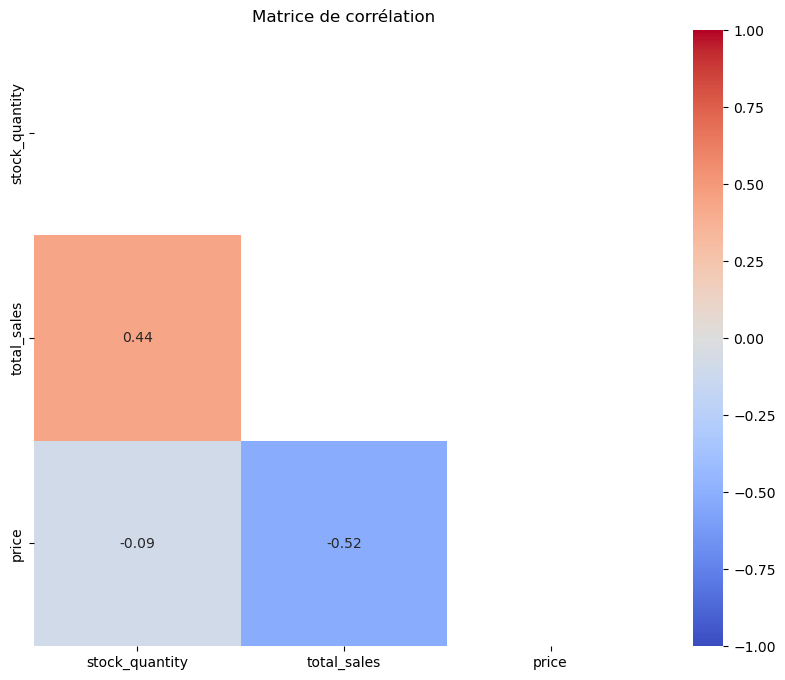

In [67]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

# Sélection des variables pour la corrélation
variables = ['stock_quantity', 'total_sales', 'price']
correlation_matrix = df_merge[variables].corr()

#Création d'un heatmap de correlation avec les variables stock, sales et price

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Affiche les valeurs
            cmap='coolwarm',  # Choix des couleurs
            mask=mask,  # Applique le mask
            fmt='.2f',  # Format des nombres
            vmin=-1, vmax=1)  # Échelle des valeurs

plt.title('Matrice de corrélation')
plt.show()
#on peut également créer un mask pour n'afficher qu'une demi heatmap


In [68]:
#Que peut-on conclure des correlations ?

#Il y a une faible corrélation positive entre totale_sales/stock_quantity = plus de stock permet potentiellement plus de ventes, dans une petite mesure
#Il y a une très faible corrélation négative entre price et stock_quantity = quasiement pas de relation entre les différents stocks et les prix du produit
#Il y a une faible corrélation négative entre totale_sales et price = les produits moins chères semblement se vendre plus alors que les plus chère moins.

#Toutes ces corrélations sont au final faibles

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [69]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel('analyse_bottleneck.xlsx', index=False)

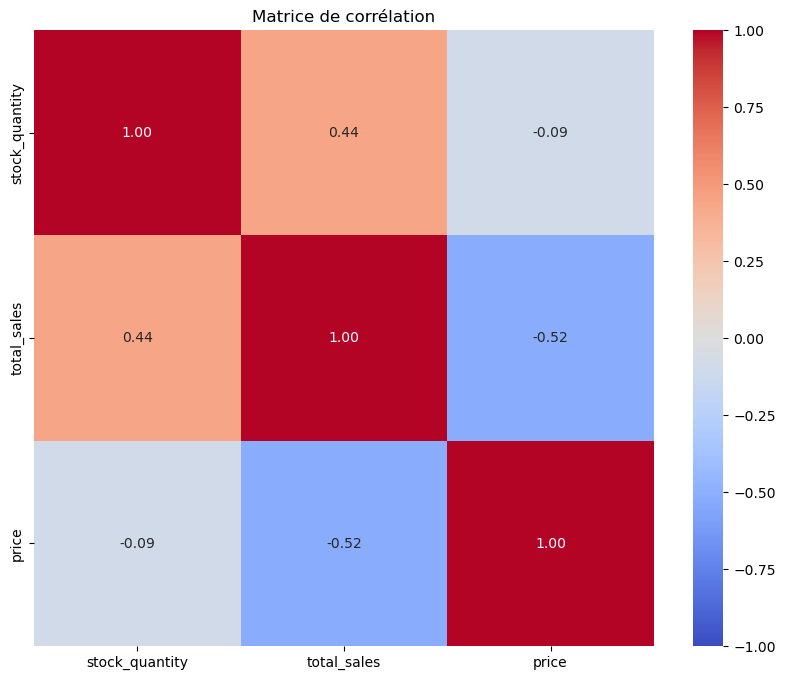

In [70]:
#Heatmap entière

# Sélection des variables pour la corrélation
variables = ['stock_quantity', 'total_sales', 'price']
correlation_matrix = df_merge[variables].corr()

#Création d'un heatmap de correlation avec les variables stock, sales et price

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
           annot=True,  # Affiche les valeurs
           cmap='coolwarm',  # Choix des couleurs
           fmt='.2f',  # Format des nombres
           vmin=-1, vmax=1)  # Échelle des valeurs

plt.title('Matrice de corrélation')
plt.show()

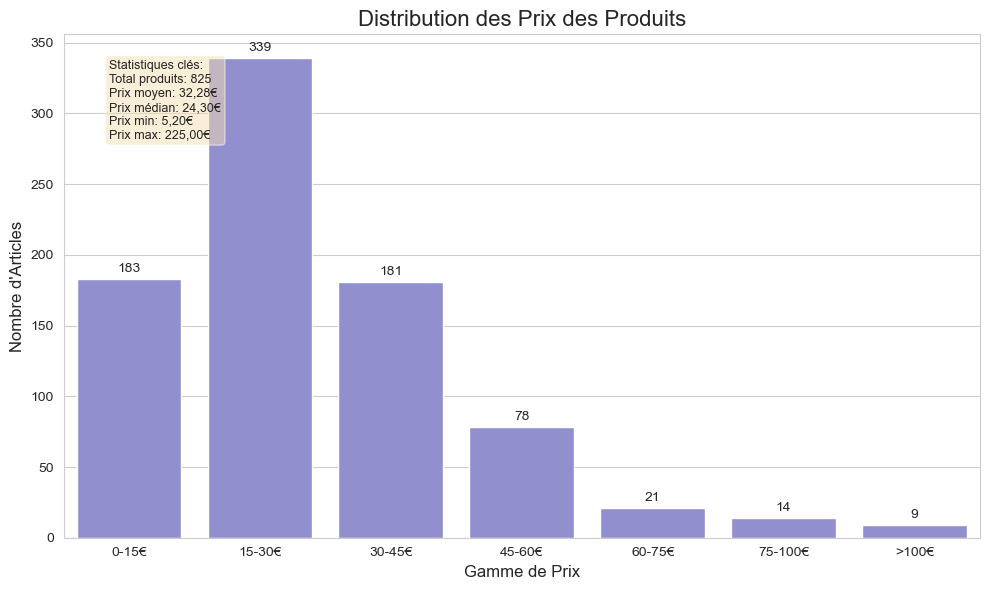

In [ ]:

#//ANALYSE VISUELLE COMPLEMENTAIRE #1//

# Données pour la distribution des prix
price_ranges = ['0-15€', '15-30€', '30-45€', '45-60€', '60-75€', '75-100€', '>100€']
counts = [183, 339, 181, 78, 21, 14, 9]

# Création d'un DataFrame pandas
df = pd.DataFrame({'Gamme de Prix': price_ranges, 'Nombre d\'Articles': counts})

# Configuration du style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Création du graphique avec Seaborn
ax = sns.barplot(x='Gamme de Prix', y='Nombre d\'Articles', data=df, color='#8884d8')

# Ajout des valeurs au-dessus des barres
for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center')

# Personnalisation du graphique
plt.title('Distribution des Prix des Produits', fontsize=16)
plt.xlabel('Gamme de Prix', fontsize=12)
plt.ylabel('Nombre d\'Articles', fontsize=12)

# Ajout d'une boîte d'info
textstr = '\n'.join((
    'Statistiques clés:',
    'Total produits: 825',
    'Prix moyen: 32,28€',
    'Prix médian: 24,30€',
    'Prix min: 5,20€',
    'Prix max: 225,00€'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# Finalisation et affichage
plt.tight_layout()
plt.savefig('distribution_prix.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

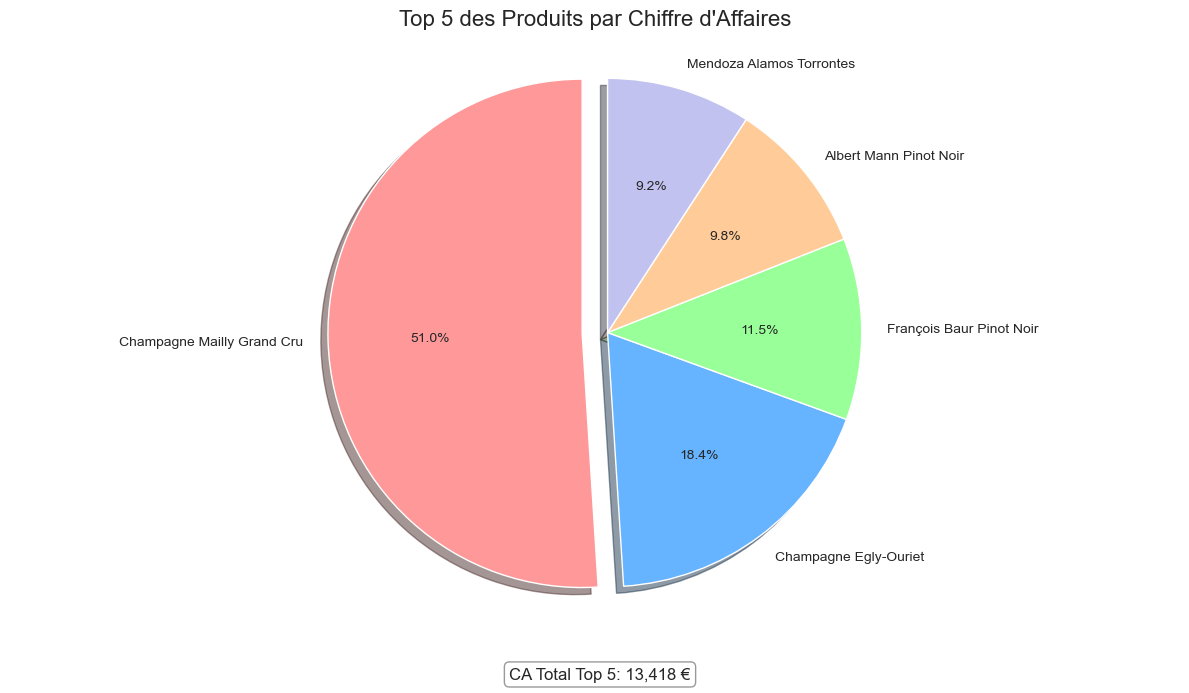

In [ ]:
#//ANALYSE VISUELLE COMPLEMENTAIRE #2//

# Configuration esthétique générale
plt.style.use('seaborn-v0_8-whitegrid')  # Style visuel propre et professionnel
plt.figure(figsize=(10, 6))  # Définit la taille de la figure (largeur, hauteur) en pouces

# Données des top 5 produits par CA
# Dans un cas réel, vous extrairiez ces données de votre DataFrame avec:
# top_products = df_merge.groupby('post_title')['ca_par_article'].sum().nlargest(5)
top_products = {
    'Champagne Mailly Grand Cru': 6844,
    'Champagne Egly-Ouriet': 2475,
    'François Baur Pinot Noir': 1549,
    'Albert Mann Pinot Noir': 1318,
    'Mendoza Alamos Torrontes': 1232
}

# Conversion en DataFrame pour faciliter les opérations
df_top = pd.DataFrame({
    'Produit': list(top_products.keys()),
    'CA': list(top_products.values())
})

# Création du graphique - Version camembert
plt.figure(figsize=(12, 7))

# Calculer le pourcentage représenté par chaque produit
total_ca = df_top['CA'].sum()
df_top['Pourcentage'] = df_top['CA'] / total_ca * 100

# Configuration des couleurs pour le camembert
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = (0.1, 0, 0, 0, 0)  # Faire ressortir le premier produit

# Création du graphique camembert
plt.pie(df_top['CA'], 
        explode=explode, 
        labels=df_top['Produit'], 
        colors=colors,
        autopct='%1.1f%%',  # Format d'affichage des pourcentages
        shadow=True, 
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})  # Bordure blanche pour lisibilité

# Configuration esthétique
plt.axis('equal')  # Assure que le camembert est circulaire
plt.title('Top 5 des Produits par Chiffre d\'Affaires', fontsize=16, pad=20)

# Ajout d'une annotation avec le CA total
plt.annotate(f'CA Total Top 5: {total_ca:,} €', 
             xy=(0.5, 0.02),  # Position au bas du graphique
             xycoords='figure fraction',  # Coordonnées relatives à la figure
             ha='center',  # Centré horizontalement
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('top5_produits_ca.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_11548\2464472862.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x700 with 0 Axes>

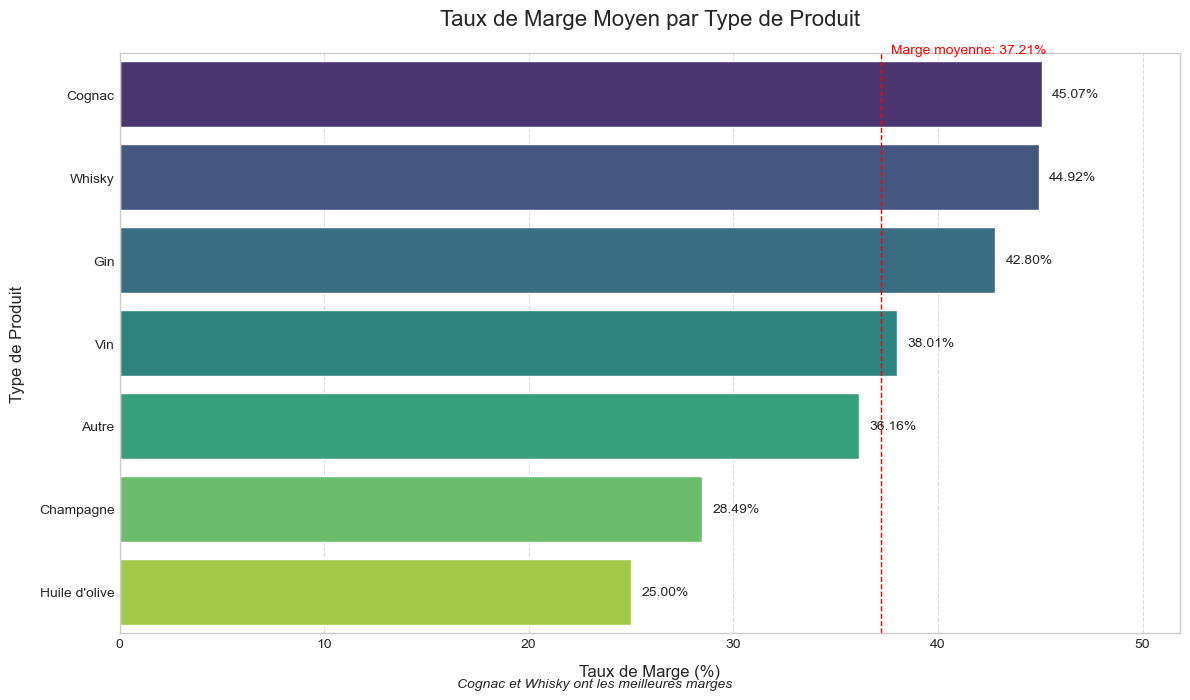

In [ ]:
#//ANALYSE VISUELLE COMPLEMENTAIRE #3//
# Configuration esthétique 
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# Données des taux de marge par type de produit
# Dans un cas réel, vous extrairiez ces données avec:
# margin_by_type = df_merge.groupby('product_type')['taux_marge'].mean().sort_values(ascending=False)
margin_data = {
    'Cognac': 45.07,
    'Whisky': 44.92,
    'Gin': 42.80,
    'Vin': 38.01,
    'Champagne': 28.49,
    'Huile d\'olive': 25.00,
    'Autre': 36.16
}

# Conversion en DataFrame
df_margin = pd.DataFrame({
    'Type': list(margin_data.keys()),
    'Taux_Marge': list(margin_data.values())
}).sort_values('Taux_Marge', ascending=False)  # Tri par taux de marge décroissant

# Création du graphique à barres horizontal
plt.figure(figsize=(12, 7))

# Palette de couleurs personnalisée - dégradé de bleus et verts
palette = sns.color_palette("viridis", len(df_margin))

# Création du graphique avec Seaborn pour un rendu plus élégant
ax = sns.barplot(x='Taux_Marge', y='Type', data=df_margin, 
                palette=palette, orient='h')

# Ajout des valeurs sur les barres
for i, v in enumerate(df_margin['Taux_Marge']):
    ax.text(v + 0.5, i, f"{v:.2f}%", va='center')

# Configuration des axes
plt.xlabel('Taux de Marge (%)', fontsize=12, labelpad=10)
plt.ylabel('Type de Produit', fontsize=12, labelpad=10)
plt.xlim(0, max(df_margin['Taux_Marge']) * 1.15)  # Espace pour les annotations

# Titre et sous-titre
plt.title('Taux de Marge Moyen par Type de Produit', fontsize=16, pad=20)
plt.figtext(0.5, 0.01, 'Cognac et Whisky ont les meilleures marges', 
            ha='center', fontsize=10, fontstyle='italic')

# Ajout d'une ligne de référence pour la marge moyenne globale
marge_moyenne = np.mean(df_margin['Taux_Marge'])
plt.axvline(x=marge_moyenne, color='red', linestyle='--', linewidth=1)
plt.text(marge_moyenne + 0.5, -0.5, f'Marge moyenne: {marge_moyenne:.2f}%', 
         color='red', fontsize=10)

# Finitions
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('taux_marge_par_type.png', dpi=300, bbox_inches='tight')
plt.show()